# Linear Regression By Maximize Likelihood (Frequentist View)

## Algebra
Whenever linear regression is discussed, usually it refers to **general linear regression** with the form:

$$
y(\boldsymbol{x}, \boldsymbol{w}) = \boldsymbol{w}^T\phi(\boldsymbol{x})
$$

where $\phi(boldsymbol{x})$ is the basis functions. Several forms of basis functions can be chosen, i.e. polynomial, Guassian, sigmoid, etc. (Show below in **Simulation** section).

In the Frequentis view, the observation $\boldsymbol{x}$ and $t$ can be related by:

$$
t = y(\boldsymbol{x}, \boldsymbol{w})  + \epsilon
$$

where $\epsilon$ is a  normal distribution $\mathscr{N}(0,\beta)$, therefore:

$$
p(t\ |\ \boldsymbol{x},\boldsymbol{w}, \beta)=\mathscr{N}(t\ |\ y(\boldsymbol{x}, \boldsymbol{w}), \beta)
$$

For an observed dataset, we have **likelihood**:

$$
p(\boldsymbol{t}\ |\ X,\boldsymbol{w}, \beta) = \prod_{n=1}^N\mathscr{N}(t_n\ |\ \boldsymbol{w}^T\phi(\boldsymbol{x}_n), \beta)
$$

To maximize likelihood, i.e. maximize $\ln{p(\boldsymbol{t}\ |\ X,\boldsymbol{w}, \beta) }$, $\boldsymbol{w}$ can be solved in a closed form:

$$
\boldsymbol{w}_{ML} = (\Phi^T\Phi)^{-1}\Phi^T\boldsymbol{t}
$$

where $\Phi$ is an N by M matrix (N is the number of observations and M is the number of basis functions) in the form:

$$
\left(
\begin{matrix}
\phi_1(\boldsymbol{x}_1)&\phi_2(\boldsymbol{x}_1)&\cdots&\phi_M(\boldsymbol{x}_1)\\
\phi_1(\boldsymbol{x}_2)&\phi_2(\boldsymbol{x}_2)&\cdots&\phi_M(\boldsymbol{x}_2)\\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(\boldsymbol{x}_N)&\phi_2(\boldsymbol{x}_N)&\cdots&\phi_M(\boldsymbol{x}_N)\\
\end{matrix}
\right)
$$

## Simulation
By tunning the number of basis functions, the fitting results will change from "underfitting" to "overfitting". "Underfitting" is smooth while "overfitting" usually results in huge variance. Polynomial basis functions are usually good choices. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def base_func(base_type, x, j, N):
    centers = [-1 + 2*i/N for i in range(0, N)]
    if base_type == "Polynomial":
        return x**j
    elif base_type == "Guassian":
        return norm.pdf((x-centers[j])/0.3)/0.3
    elif base_type == "Sigmoid":
        return (np.tanh((x-centers[j])/0.1)+1)/2
    else:
        print("No such type")
        raise

def base_plots(N, X):
    fig, axes = plt.subplots(1, 3, figsize = (20, 5))
    base_type = ["Polynomial", "Guassian", "Sigmoid"]
    
    for i in range(3):
        for j in range( N):
            axes[i].plot(X, base_func(base_type[i], X, j, N))
            axes[i].set_title("{} basis functions (N={})".format(base_type[i], N), fontsize = 15)
    plt.show()

def sampling(X, size = 300, std = 0.1):
    begin, end = min(X), max(X)
    xx = np.random.uniform(begin, end, size)
    yy = np.sin(xx*np.pi) + np.random.normal(0, std, size)
    return xx, yy

def fitting(x, y, X, Y, N):
    fig, axes = plt.subplots(1, 3, figsize = (20, 5))
    base_type = ["Polynomial", "Guassian", "Sigmoid"]
    for i in range(3):
        phi = []
        for j in range(N):
            phi.append(base_func(base_type[i], xx, j, N))
        phi = np.array(phi).T
        weight = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(yy)
        
        axes[i].scatter(x, phi.dot(weight), alpha = 0.2 , linewidth = 4)
        axes[i].plot(X, Y, linestyle = "dashed", color = "red", linewidth = 3)
        axes[i].set_title("{} basis functions (N={})".format(base_type[i], N), fontsize = 15)
    plt.show()

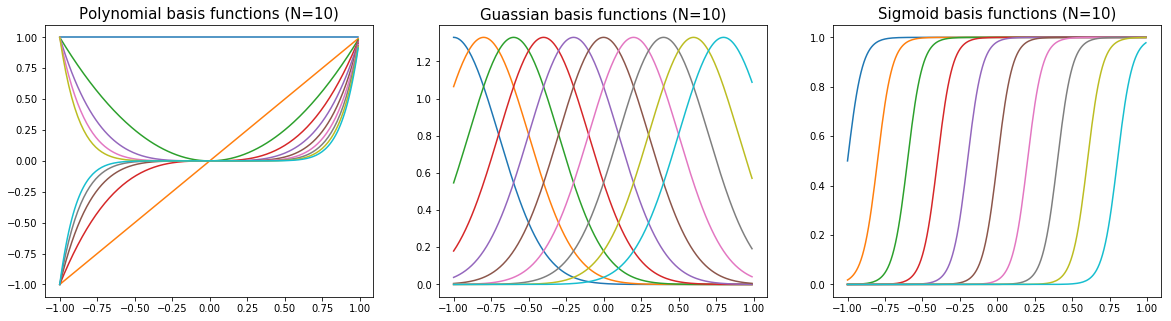

Underfitting:


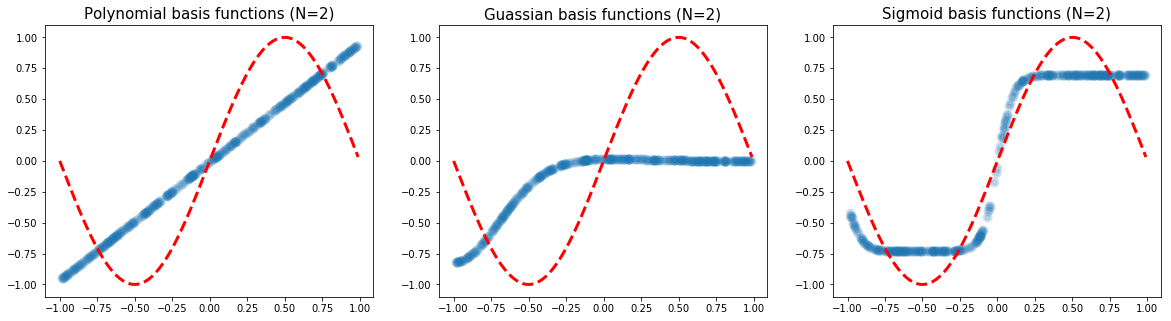

Just right:


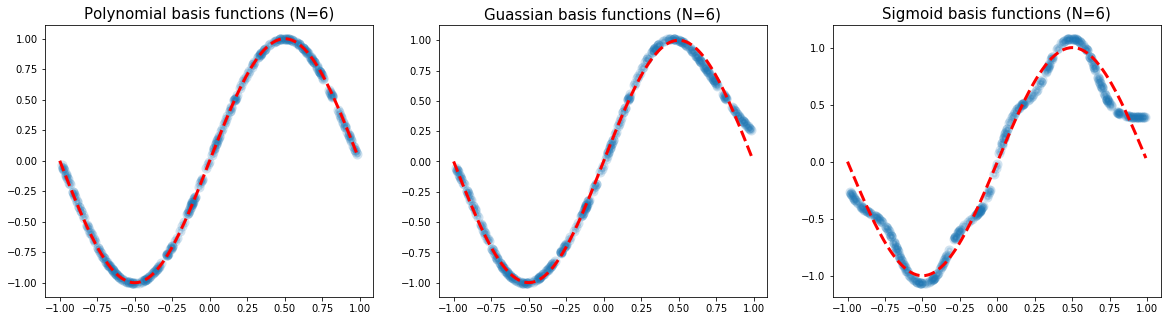

Overfitting:


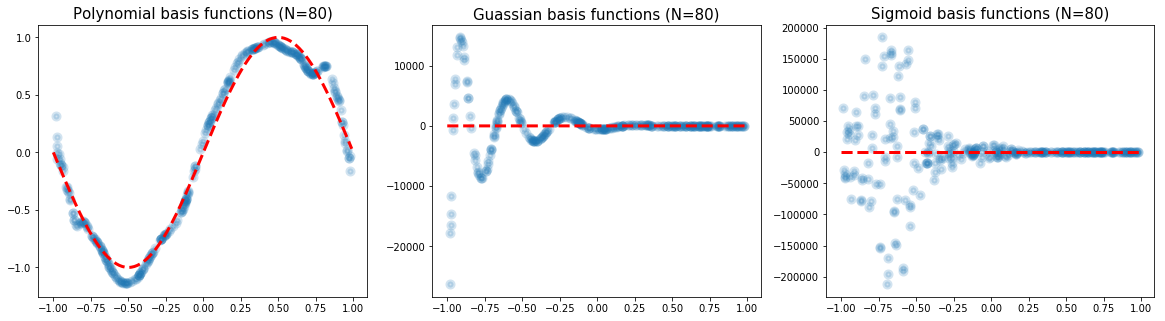

In [2]:
X = np.arange(-1,1,0.01)
Y = np.sin(X*np.pi)
base_plots(10, X)
xx, yy = sampling(X)
print("Underfitting:")
fitting(xx, yy, X, Y, 2)
print("Just right:")
fitting(xx, yy, X, Y, 6)
print("Overfitting:")
fitting(xx, yy, X, Y, 80)